##  MNIST

In [ ]:
import os
import numpy as np
import torch
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
from urllib.request import urlretrieve
from urllib.parse import urljoin
from scipy import io
import bz2
import matplotlib.pyplot as plt
import torchvision
import random
import gzip

random.seed(1)
np.random.seed(1)




cwd = os.getcwd()


data_dir = os.path.join(cwd, 'data')
if not os.path.isdir(data_dir):
    os.mkdir(data_dir)

def get_mnist(getRGB=False, setSizeTo32=False):
    transform_list = [transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]
    if setSizeTo32:
        transform_list.insert(0, transforms.Pad(2))
    if getRGB:
        transform_list.insert(0, transforms.Lambda(lambda x: x.repeat(3, 1, 1)))
    transform = transforms.Compose(transform_list)

    mnist_train = MNIST(root=data_dir, train=True, download=True, transform=transform)
    mnist_test = MNIST(root=data_dir, train=False, download=True, transform=transform)

    tr_data = mnist_train.data.numpy().astype(np.float32)
    tr_labels = mnist_train.targets.numpy().astype(np.int64)
    ts_data = mnist_test.data.numpy().astype(np.float32)
    ts_labels = mnist_test.targets.numpy().astype(np.int64)

    if setSizeTo32:
        tr_data = np.pad(tr_data, ((0, 0), (2, 2), (2, 2)), 'constant')
        ts_data = np.pad(ts_data, ((0, 0), (2, 2), (2, 2)), 'constant')

    if getRGB:
        tr_data = np.repeat(tr_data[:, np.newaxis, :, :], 3, axis=1)
        ts_data = np.repeat(ts_data[:, np.newaxis, :, :], 3, axis=1)
    else:
        tr_data = tr_data[:, np.newaxis, :, :]
        ts_data = ts_data[:, np.newaxis, :, :]

    tr_data = 2 * ((tr_data / 255.0) - 0.5)
    ts_data = 2 * ((ts_data / 255.0) - 0.5)

    return tr_data, tr_labels, ts_data, ts_labels



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 15970621.18it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 475743.42it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4424078.08it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 4926436.20it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



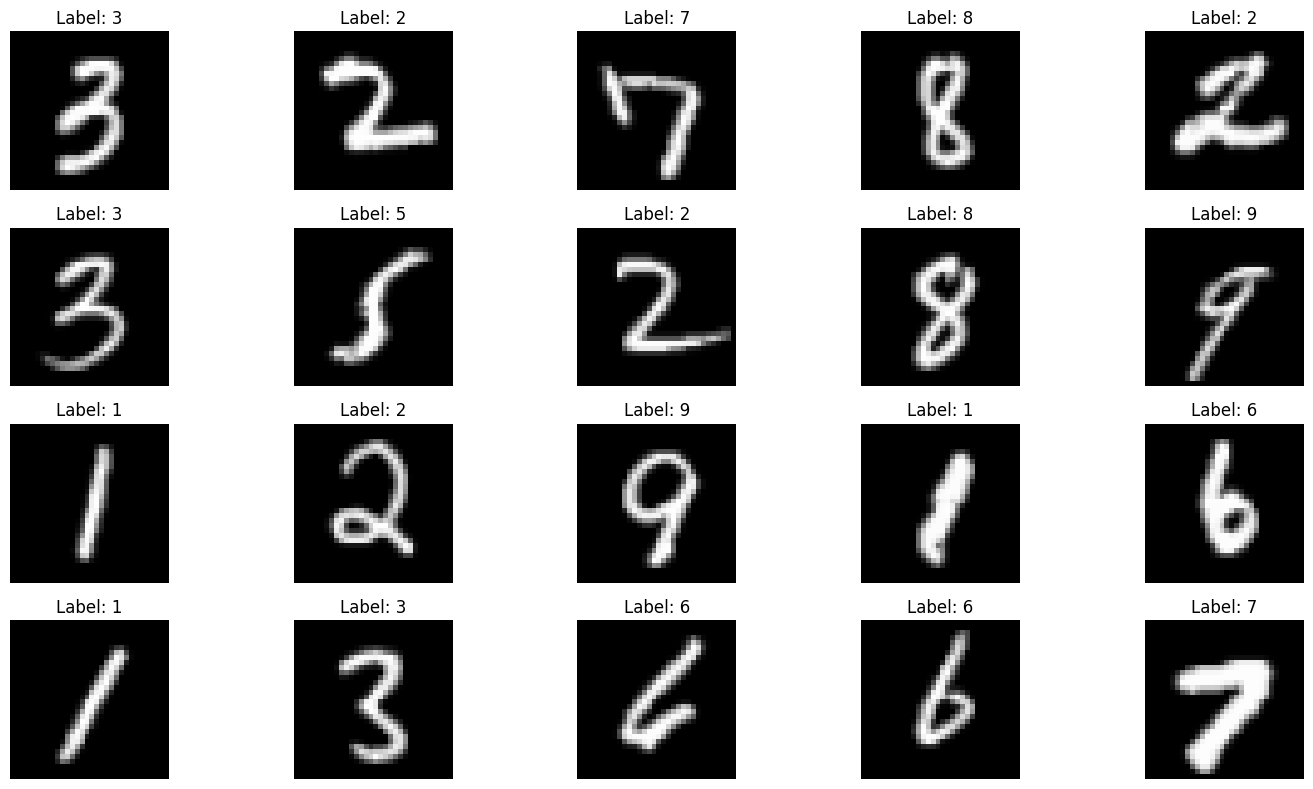

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch


def get_mnist(getRGB=True, setSizeTo32=True):
    from torchvision import datasets, transforms
    import numpy as np

    size = 32 if setSizeTo32 else 28
    if getRGB:
        transform = transforms.Compose([
            transforms.Grayscale(num_output_channels=3),
            transforms.Resize((size, size)),
            transforms.ToTensor(),
            transforms.Normalize((0.5,), (0.5,))
        ])
    else:
        transform = transforms.Compose([
            transforms.Resize((size, size)),
            transforms.ToTensor(),
            transforms.Normalize((0.5,), (0.5,))
        ])

    train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
    test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

    tgt_trX = np.array([train_dataset[i][0].numpy() for i in range(len(train_dataset))])
    tgt_trY = np.array([train_dataset[i][1] for i in range(len(train_dataset))])
    tgt_tsX = np.array([test_dataset[i][0].numpy() for i in range(len(test_dataset))])
    tgt_tsY = np.array([test_dataset[i][1] for i in range(len(test_dataset))])

    return tgt_trX, tgt_trY, tgt_tsX, tgt_tsY


getRGB = True
setSizeTo32 = True
size = 32 if setSizeTo32 else 28


tgt_trX, tgt_trY, tgt_tsX, tgt_tsY = get_mnist(getRGB=getRGB, setSizeTo32=setSizeTo32)




def visualize_samples(tgt_trX, tgt_tsX, tgt_trY, tgt_tsY, getRGB=True, num_samples=20, samples_per_row=5):

    indices_tr = np.random.choice(len(tgt_trX), num_samples // 2, replace=False)
    indices_ts = np.random.choice(len(tgt_tsX), num_samples // 2, replace=False)

    if getRGB:
        visx_tr = torch.tensor(tgt_trX[indices_tr]).permute(0, 2, 3, 1)  #Convert to (N, H, W, C) format
        visx_ts = torch.tensor(tgt_tsX[indices_ts]).permute(0, 2, 3, 1)
    else:
        visx_tr = torch.tensor(tgt_trX[indices_tr]).squeeze(1)  #Convert to (N, H, W) format for grayscale
        visx_ts = torch.tensor(tgt_tsX[indices_ts]).squeeze(1)

    visx = torch.cat((visx_tr, visx_ts))
    visy = torch.cat((torch.tensor(tgt_trY[indices_tr]), torch.tensor(tgt_tsY[indices_ts])))

    fig, axes = plt.subplots(num_samples // samples_per_row, samples_per_row, figsize=(15, 8))
    axes = axes.flatten()

    for i in range(num_samples):
        if getRGB:
            img = visx[i].numpy() / 2 + 0.5  #Unnormalize
            axes[i].imshow(img)
        else:
            img = visx[i].numpy()
            axes[i].imshow(img, cmap='gray')
        axes[i].set_title(f'Label: {visy[i].item()}')
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()


visualize_samples(tgt_trX, tgt_tsX, tgt_trY, tgt_tsY, getRGB)


## SVHN

Street View House Number (SVHN): images are 32 × 32 pixels RGB. Similarly to
the MNIST dataset, digits range from 0 to 9. However, in
SVHN images have variable colour intensities and depict
non-centered digits. Thus, there is a significant domain shift with respect to MNIST.

In [ ]:
svhn_url = 'http://ufldl.stanford.edu/housenumbers/'

def get_svhn(getRGB=False):
    train_file = 'train_32x32.mat'
    test_file = 'test_32x32.mat'
    download_and_extract(data_dir, svhn_url, train_file)
    download_and_extract(data_dir, svhn_url, test_file)

    svhn_tr_data = io.loadmat(os.path.join(data_dir, train_file))
    tr_data, tr_labels = process_svhn_data(svhn_tr_data, getRGB)

    svhn_ts_data = io.loadmat(os.path.join(data_dir, test_file))
    ts_data, ts_labels = process_svhn_data(svhn_ts_data, getRGB)

    return tr_data, tr_labels, ts_data, ts_labels



def download_and_extract(data_dir, base_url, file_name):
    full_path = os.path.join(data_dir, file_name)
    if not os.path.exists(full_path):
        url = urljoin(base_url, file_name)
        urlretrieve(url, full_path)
    if file_name.endswith('.gz'):
        extract_gzip(full_path)

def extract_gzip(file_path):
    with gzip.open(file_path, 'rb') as f_in:
        with open(file_path.replace('.gz', ''), 'wb') as f_out:
            f_out.write(f_in.read())



def process_svhn_data(data, getRGB):
    images = data['X']
    labels = data['y'].astype(np.int64).squeeze()
    labels[labels == 10] = 0
    if getRGB:
        images = images.transpose(3, 2, 0, 1)
    else:
        images = np.dot(images, [0.2125, 0.7154, 0.0721]).reshape(32, 32, 1, -1).transpose(3, 2, 0, 1)
    images = normalize_data(images.astype(np.float32))
    return images, labels



def normalize_data(data):
    return 2 * (data / 255.0) - 1

src_trX, src_trY, src_tsX, src_tsY = get_svhn(getRGB=getRGB)

In [ ]:
src_trX = torch.tensor(src_trX, dtype=torch.float32)
src_trY = torch.tensor(src_trY, dtype=torch.long)
src_tsX = torch.tensor(src_tsX, dtype=torch.float32)
src_tsY = torch.tensor(src_tsY, dtype=torch.long)

tgt_trX = torch.tensor(tgt_trX, dtype=torch.float32)
tgt_trY = torch.tensor(tgt_trY, dtype=torch.long)
tgt_tsX = torch.tensor(tgt_tsX, dtype=torch.float32)
tgt_tsY = torch.tensor(tgt_tsY, dtype=torch.long)


labels
[[1 9 2 3 2 5 9 3 3 1]
 [5 2 1 0 6 1 9 1 1 8]]


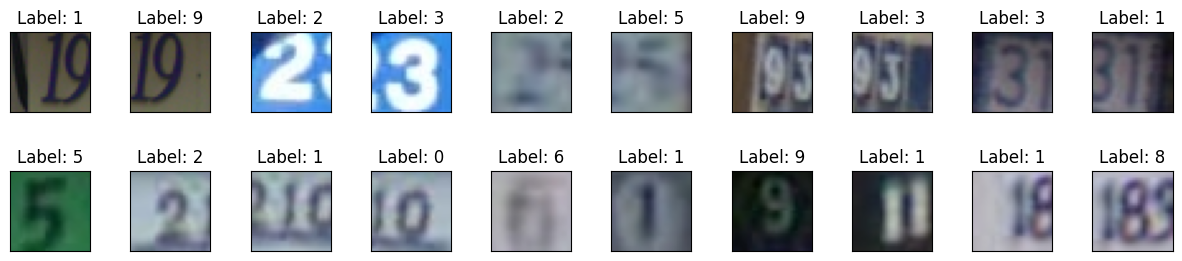

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.pyplot as plt
import numpy as np
import torch



def visualize_samples(src_trX, src_trY, src_tsX, src_tsY, getRGB, num_samples=20, samples_per_row=10):

    if len(src_trX.shape) == 2:
        src_trX = src_trX.reshape(-1, 3, 32, 32)
        src_tsX = src_tsX.reshape(-1, 3, 32, 32)

    if len(src_trX.shape) == 3:
        src_trX = src_trX.unsqueeze(1)
        src_tsX = src_tsX.unsqueeze(1)

    indices_tr = torch.arange(num_samples // 2)
    indices_ts = torch.arange(num_samples // 2)

    visx_tr = src_trX[indices_tr]
    visx_ts = src_tsX[indices_ts]

    if getRGB:
        visx_tr = visx_tr.permute(0, 2, 3, 1).numpy()  #Convert to (N, H, W, C) format
        visx_ts = visx_ts.permute(0, 2, 3, 1).numpy()
    else:
        visx_tr = visx_tr.squeeze(1).numpy()  #Convert to (N, H, W) format for grayscale
        visx_ts = visx_ts.squeeze(1).numpy()

    visx = np.concatenate((visx_tr, visx_ts), axis=0)
    visx = (visx + 1) / 2.  #Scaling back to [0-1]

    visy = np.concatenate((src_trY[:num_samples // 2], src_tsY[:num_samples // 2])).reshape(2, -1)

    print('labels')
    print(visy)

    fig, axes = plt.subplots(2, samples_per_row, figsize=(15, 3))
    fig.subplots_adjust(hspace=0.5, wspace=0.5)
    for i, ax in enumerate(axes.flat):
        if getRGB:
            ax.imshow(visx[i])
        else:
            ax.imshow(visx[i], cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(f'Label: {visy.flat[i]}')

    plt.show()


getRGB = True
visualize_samples(src_trX, src_trY, src_tsX, src_tsY, getRGB)





SVHN is more diverse, a model trained on SVHN is expected to be
more generic and to perform reasonably on the MNIST dataset.
Unsupervised adaptation from MNIST to SVHN gives a failure
example for this approach.

## CORAL

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, TensorDataset

class FeatureExtractor(nn.Module):
    def __init__(self):
        super(FeatureExtractor, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.BatchNorm2d(32),

            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.BatchNorm2d(64),

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.AdaptiveAvgPool2d(1)
        )

        self.classifier = nn.Sequential(
            nn.Linear(128, 128),
            nn.ReLU(inplace=True),
            nn.BatchNorm1d(128)
        )

        self._initialize_weights()

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
                nn.init.kaiming_normal_(m.weight)

class LabelClassifier(nn.Module):
    def __init__(self):
        super(LabelClassifier, self).__init__()
        self.classifier = nn.Sequential(
            nn.Linear(128, 64),
            nn.ReLU(inplace=True),
            nn.BatchNorm1d(64),
            nn.Linear(64, 10)
        )
        self._initialize_weights()

    def forward(self, x):
        x = self.classifier(x)
        return x

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0.0, 0.02)

class GradReverse(torch.autograd.Function):
    @staticmethod
    def forward(ctx, x, lambd):
        ctx.lambd = lambd
        return x.view_as(x)

    @staticmethod
    def backward(ctx, grad_output):
        return grad_output.neg() * ctx.lambd, None

class DomainClassifier(nn.Module):
    def __init__(self):
        super(DomainClassifier, self).__init__()
        self.classifier = nn.Sequential(
            nn.Linear(128, 128),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.BatchNorm1d(128),
            nn.Linear(128, 64),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.BatchNorm1d(64),
            nn.Linear(64, 1)
        )
        self._initialize_weights()

    def forward(self, x, lambd=0.0):
        x = GradReverse.apply(x, lambd)
        x = self.classifier(x)
        return torch.sigmoid(x)

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0.0, 0.02)


def coral_loss(source, target):
    d = source.size(1)
    source_cov = torch.mm((source - torch.mean(source, 0)).t(), (source - torch.mean(source, 0))) / (source.size(0) - 1)
    target_cov = torch.mm((target - torch.mean(target, 0)).t(), (target - torch.mean(target, 0))) / (target.size(0) - 1)
    loss = torch.mean(torch.mul((source_cov - target_cov), (source_cov - target_cov)))
    loss /= (4 * d * d)
    return loss


In [ ]:
train_dataset = TensorDataset(src_trX, src_trY)
test_dataset = TensorDataset(src_tsX, src_tsY)

tgt_train_dataset = TensorDataset(tgt_trX, tgt_trY)
tgt_test_dataset = TensorDataset(tgt_tsX, tgt_tsY)

svhn_train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
svhn_test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

mnist_train_loader = DataLoader(tgt_train_dataset, batch_size=64, shuffle=True)
mnist_test_loader = DataLoader(tgt_test_dataset, batch_size=64, shuffle=False)


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

feature_extractor = FeatureExtractor().to(device)
label_classifier = LabelClassifier().to(device)
domain_classifier = DomainClassifier().to(device)


classification_loss_fn = nn.CrossEntropyLoss()
domain_loss_fn = nn.BCELoss()


optimizer_fe = torch.optim.Adam(feature_extractor.parameters(), lr=0.001)
optimizer_lc = torch.optim.Adam(label_classifier.parameters(), lr=0.001)
optimizer_dc = torch.optim.Adam(domain_classifier.parameters(), lr=0.001)

In [ ]:
import torch
import numpy as np
from collections import defaultdict

def extract_features(loader, model, device, sample_fraction=0.1):
    model.eval()
    features = []
    labels = []


    class_data = defaultdict(list)


    for images, targets in loader:
        for image, target in zip(images, targets):
            class_data[target.item()].append(image)

    with torch.no_grad():
        for class_id, images in class_data.items():

            num_samples = max(0.1, int(len(images) * sample_fraction))
            sampled_indices = np.random.choice(len(images), num_samples, replace=False)
            sampled_images = [images[idx] for idx in sampled_indices]


            mini_batch = torch.stack(sampled_images).to(device)
            outputs = model(mini_batch)

            features.append(outputs.cpu().numpy())
            labels.extend([class_id] * num_samples)

    return np.concatenate(features), np.array(labels)

In [ ]:
mnist_features_before, mnist_labels_before = extract_features(mnist_train_loader, feature_extractor, device)
svhn_features_before, svhn_labels_before = extract_features(svhn_train_loader, feature_extractor, device)


In [ ]:
from sklearn.manifold import TSNE
# Function to apply t-SNE and plot
def plot_tsne(features, labels, domain_labels, title):
    tsne = TSNE(n_components=2, random_state=42)
    features_2d = tsne.fit_transform(features)

    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(features_2d[:, 0], features_2d[:, 1], c=domain_labels, cmap='tab10')
    plt.legend(handles=scatter.legend_elements()[0], labels=['MNIST', 'SVHN'])
    plt.title(title)
    plt.show()

In [ ]:
def prepare_features(mnist_features, svhn_features, mnist_labels, svhn_labels):
    features_combined = np.concatenate([mnist_features, svhn_features])
    labels_combined = np.concatenate([mnist_labels, svhn_labels])
    domain_labels_combined = np.concatenate([
        np.zeros(mnist_features.shape[0]),  # MNIST
        np.ones(svhn_features.shape[0])     # SVHN
    ])
    return features_combined, labels_combined, domain_labels_combined

In [ ]:
features_before, labels_before, domain_labels_before = prepare_features(mnist_features_before, svhn_features_before, mnist_labels_before, svhn_labels_before)

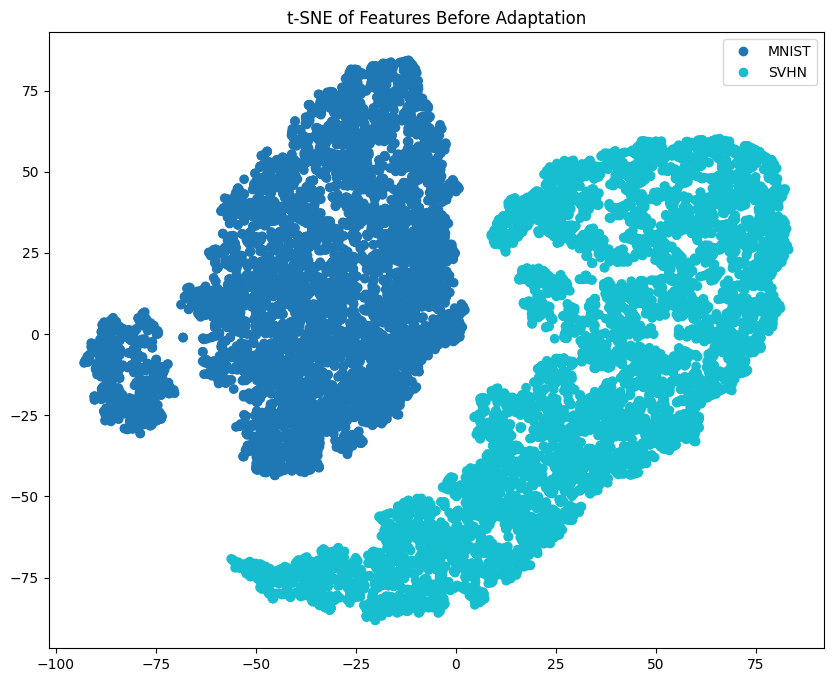

In [ ]:
# Plot t-SNE for features before and after adaptation
plot_tsne(features_before, labels_before, domain_labels_before, 't-SNE of Features Before Adaptation')
#plot_tsne(features_after, labels_after, 't-SNE of Features After Adaptation')

In [ ]:
def train_with_coral(num_epochs, src_loader, tgt_loader):
    feature_extractor.train()
    label_classifier.train()
    domain_classifier.train()

    for epoch in range(num_epochs):
        total_class_loss = 0
        total_domain_loss = 0
        total_coral_loss = 0

        src_iter = iter(src_loader)
        tgt_iter = iter(tgt_loader)
        num_batches = min(len(src_iter), len(tgt_iter))

        for _ in range(num_batches):
            src_images, src_labels = next(src_iter)
            tgt_images, _ = next(tgt_iter)

            src_images, src_labels = src_images.to(device), src_labels.to(device)
            tgt_images = tgt_images.to(device)


            src_features = feature_extractor(src_images)
            tgt_features = feature_extractor(tgt_images)

            class_preds = label_classifier(src_features)
            domain_preds_src = domain_classifier(src_features, lambd=1.0)
            domain_preds_tgt = domain_classifier(tgt_features, lambd=1.0)


            domain_labels_src = torch.ones(src_images.size(0), 1).to(device)
            domain_labels_tgt = torch.zeros(tgt_images.size(0), 1).to(device)


            class_loss = classification_loss_fn(class_preds, src_labels)
            coral_loss_val = coral_loss(src_features, tgt_features)
            domain_loss_src = domain_loss_fn(domain_preds_src, domain_labels_src)
            domain_loss_tgt = domain_loss_fn(domain_preds_tgt, domain_labels_tgt)


            domain_loss = 0.5 * (domain_loss_src + domain_loss_tgt)
            total_loss = class_loss + coral_loss_val + domain_loss


            optimizer_fe.zero_grad()
            optimizer_lc.zero_grad()
            optimizer_dc.zero_grad()


            total_loss.backward()
            optimizer_fe.step()
            optimizer_lc.step()
            optimizer_dc.step()

            total_class_loss += class_loss.item()
            total_domain_loss += domain_loss.item()
            total_coral_loss += coral_loss_val.item()

        avg_class_loss = total_class_loss / num_batches
        avg_domain_loss = total_domain_loss / num_batches
        avg_coral_loss = total_coral_loss / num_batches

        print(f'Epoch [{epoch+1}/{num_epochs}], Classification Loss: {avg_class_loss:.4f}, Domain Loss: {avg_domain_loss:.4f}')


def evaluate(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            features = feature_extractor(images)
            outputs = label_classifier(features)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f}%")

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix




def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.title('Confusion Matrix')
    plt.show()


def plot_misclassified_examples(feature_extractor, label_classifier, test_loader, classes, num_examples=5):
    feature_extractor.eval()
    label_classifier.eval()

    misclassified_images = []
    misclassified_labels = []
    misclassified_preds = []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            features = feature_extractor(images)
            outputs = label_classifier(features)
            _, predicted = torch.max(outputs, 1)

            misclassified_idx = (predicted != labels).nonzero(as_tuple=True)[0]
            for idx in misclassified_idx:
                if len(misclassified_images) < num_examples:
                    misclassified_images.append(images[idx].cpu())
                    misclassified_labels.append(labels[idx].cpu().item())
                    misclassified_preds.append(predicted[idx].cpu().item())
                else:
                    break

    fig, axes = plt.subplots(1, num_examples, figsize=(15, 5))
    for i in range(num_examples):
        image = misclassified_images[i].permute(1, 2, 0).numpy() / 2 + 0.5  # Unnormalize
        true_label = classes[misclassified_labels[i]]
        pred_label = classes[misclassified_preds[i]]
        axes[i].imshow(image)
        axes[i].set_title(f'True: {true_label}\nPred: {pred_label}')
        axes[i].axis('off')

    plt.show()

class_names = [str(i) for i in range(10)]






In [ ]:
train_with_coral(20, mnist_train_loader, svhn_train_loader)

evaluate(feature_extractor, svhn_test_loader)



Epoch [1/20], Classification Loss: 0.1680, Domain Loss: 0.6932
Epoch [2/20], Classification Loss: 0.0404, Domain Loss: 0.6931
Epoch [3/20], Classification Loss: 0.0318, Domain Loss: 0.6931
Epoch [4/20], Classification Loss: 0.0248, Domain Loss: 0.6931
Epoch [5/20], Classification Loss: 0.0237, Domain Loss: 0.6931
Epoch [6/20], Classification Loss: 0.0197, Domain Loss: 0.6931
Epoch [7/20], Classification Loss: 0.0166, Domain Loss: 0.6931
Epoch [8/20], Classification Loss: 0.0159, Domain Loss: 0.6931
Epoch [9/20], Classification Loss: 0.0108, Domain Loss: 0.6931
Epoch [10/20], Classification Loss: 0.0127, Domain Loss: 0.6931
Epoch [11/20], Classification Loss: 0.0103, Domain Loss: 0.6931
Epoch [12/20], Classification Loss: 0.0092, Domain Loss: 0.6931
Epoch [13/20], Classification Loss: 0.0083, Domain Loss: 0.6931
Epoch [14/20], Classification Loss: 0.0072, Domain Loss: 0.6931
Epoch [15/20], Classification Loss: 0.0064, Domain Loss: 0.6931
Epoch [16/20], Classification Loss: 0.0070, Domai

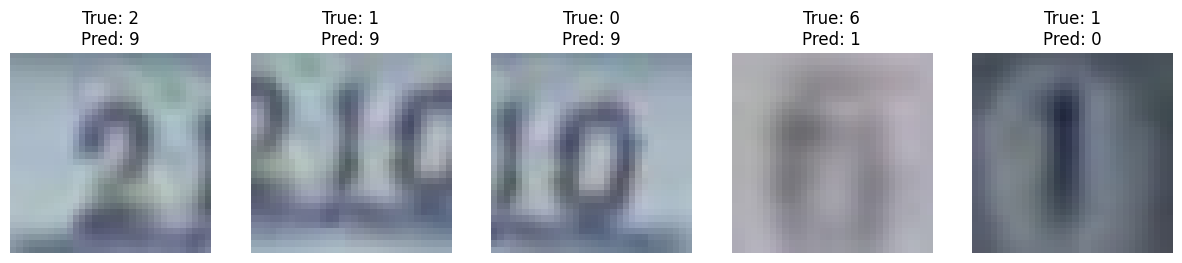

In [ ]:
plot_misclassified_examples(feature_extractor, label_classifier, svhn_test_loader, class_names)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
feature_extractor = FeatureExtractor().to(device)
label_classifier = LabelClassifier().to(device)
domain_classifier = DomainClassifier().to(device)

optimizer_fe = torch.optim.Adam(feature_extractor.parameters(), lr=0.0001)
optimizer_lc = torch.optim.Adam(label_classifier.parameters(), lr=0.0001)
optimizer_dc = torch.optim.Adam(domain_classifier.parameters(), lr=0.0001)

Epoch [1/20], Classification Loss: 1.9097, Domain Loss: 0.6940
Epoch [2/20], Classification Loss: 1.0716, Domain Loss: 0.6932
Epoch [3/20], Classification Loss: 0.6415, Domain Loss: 0.6931
Epoch [4/20], Classification Loss: 0.4641, Domain Loss: 0.6931
Epoch [5/20], Classification Loss: 0.3779, Domain Loss: 0.6931
Epoch [6/20], Classification Loss: 0.3213, Domain Loss: 0.6931
Epoch [7/20], Classification Loss: 0.2845, Domain Loss: 0.6931
Epoch [8/20], Classification Loss: 0.2582, Domain Loss: 0.6931
Epoch [9/20], Classification Loss: 0.2325, Domain Loss: 0.6931
Epoch [10/20], Classification Loss: 0.2089, Domain Loss: 0.6931
Epoch [11/20], Classification Loss: 0.1884, Domain Loss: 0.6931
Epoch [12/20], Classification Loss: 0.1697, Domain Loss: 0.6931
Epoch [13/20], Classification Loss: 0.1574, Domain Loss: 0.6931
Epoch [14/20], Classification Loss: 0.1402, Domain Loss: 0.6931
Epoch [15/20], Classification Loss: 0.1252, Domain Loss: 0.6931
Epoch [16/20], Classification Loss: 0.1152, Domai

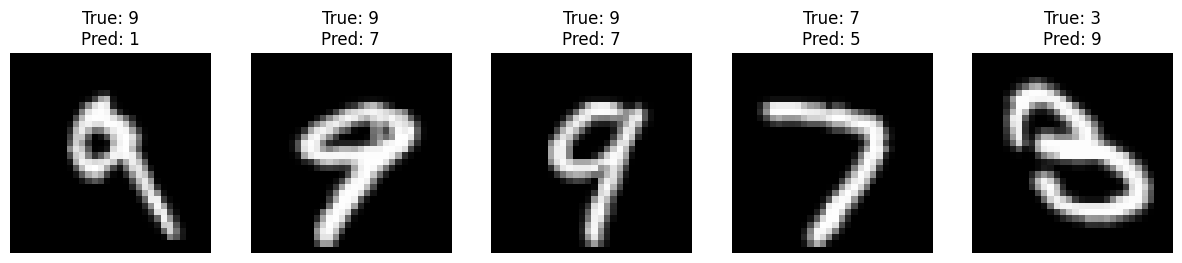

In [ ]:
train_with_coral(20, svhn_train_loader, mnist_train_loader)

evaluate(feature_extractor, mnist_test_loader)    #ver 2

plot_misclassified_examples(feature_extractor, label_classifier, mnist_test_loader, class_names)

## Simple CNN

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import torchvision.transforms as transforms


class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc = nn.Linear(16 * 16 * 16, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = x.view(-1, 16 * 16 * 16)
        x = self.fc(x)
        return x


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [ ]:
def train(model, criterion, optimizer, train_loader, num_epochs=10):
    model.train()

    for epoch in range(num_epochs):
        running_loss = 0.0

        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * images.size(0)

        epoch_loss = running_loss / len(train_loader.dataset)
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}")



def evaluate(model, test_loader):
    model.eval()

    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f}%")




In [ ]:
train(model, criterion, optimizer, mnist_train_loader, num_epochs=20)
evaluate(model, svhn_test_loader)

Epoch [1/20], Loss: 0.0590
Epoch [2/20], Loss: 0.0492
Epoch [3/20], Loss: 0.0453
Epoch [4/20], Loss: 0.0401
Epoch [5/20], Loss: 0.0356
Epoch [6/20], Loss: 0.0324
Epoch [7/20], Loss: 0.0310
Epoch [8/20], Loss: 0.0272
Epoch [9/20], Loss: 0.0236
Epoch [10/20], Loss: 0.0219
Epoch [11/20], Loss: 0.0187
Epoch [12/20], Loss: 0.0176
Epoch [13/20], Loss: 0.0171
Epoch [14/20], Loss: 0.0152
Epoch [15/20], Loss: 0.0125
Epoch [16/20], Loss: 0.0119
Epoch [17/20], Loss: 0.0111
Epoch [18/20], Loss: 0.0108
Epoch [19/20], Loss: 0.0098
Epoch [20/20], Loss: 0.0090
Test Accuracy: 18.83%


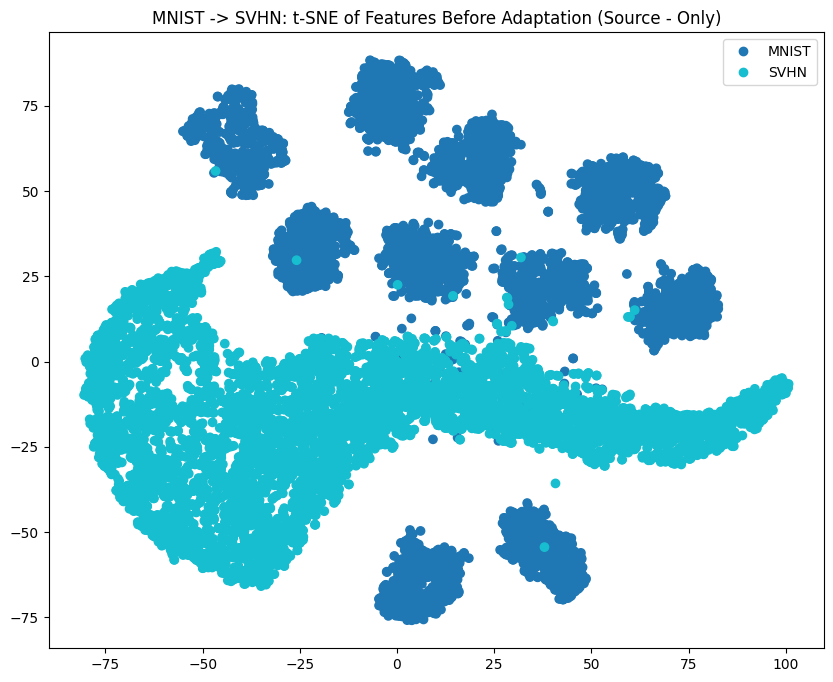

In [ ]:
mnist_features_after, mnist_labels_after = extract_features(mnist_train_loader, model, device, sample_fraction = 0.1)
svhn_features_after, svhn_labels_after = extract_features(svhn_train_loader, model, device, sample_fraction = 0.1)

features_after, labels_after, domain_labels_after = prepare_features(mnist_features_after, svhn_features_after, mnist_labels_after, svhn_labels_after)

plot_tsne(features_after, labels_after,domain_labels_after, 'MNIST -> SVHN: t-SNE of Features Before Adaptation (Source - Only)')

In [ ]:
model = SimpleCNN().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
train(model, criterion, optimizer, svhn_train_loader, num_epochs=20)
evaluate(model, mnist_test_loader)

Epoch [1/20], Loss: 1.2238
Epoch [2/20], Loss: 0.7176
Epoch [3/20], Loss: 0.6439
Epoch [4/20], Loss: 0.6153
Epoch [5/20], Loss: 0.5977
Epoch [6/20], Loss: 0.5793
Epoch [7/20], Loss: 0.5661
Epoch [8/20], Loss: 0.5553
Epoch [9/20], Loss: 0.5480
Epoch [10/20], Loss: 0.5416
Epoch [11/20], Loss: 0.5331
Epoch [12/20], Loss: 0.5253
Epoch [13/20], Loss: 0.5168
Epoch [14/20], Loss: 0.5122
Epoch [15/20], Loss: 0.5042
Epoch [16/20], Loss: 0.5010
Epoch [17/20], Loss: 0.4929
Epoch [18/20], Loss: 0.4869
Epoch [19/20], Loss: 0.4821
Epoch [20/20], Loss: 0.4774
Test Accuracy: 53.42%


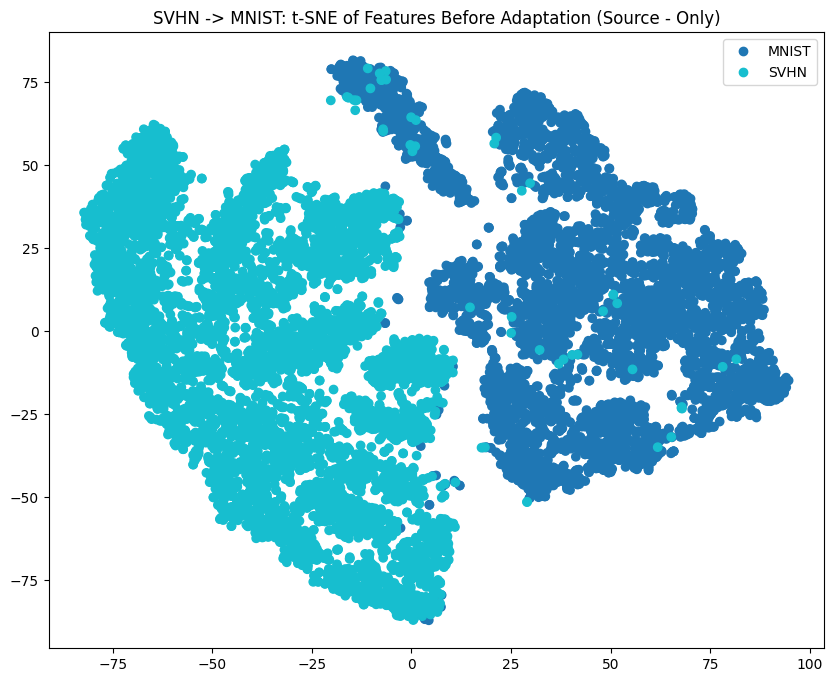

In [ ]:
mnist_features_after, mnist_labels_after = extract_features(mnist_train_loader, model, device, sample_fraction = 0.1)
svhn_features_after, svhn_labels_after = extract_features(svhn_train_loader, model, device, sample_fraction = 0.1)

features_after, labels_after, domain_labels_after = prepare_features(mnist_features_after, svhn_features_after, mnist_labels_after, svhn_labels_after)

plot_tsne(features_after, labels_after,domain_labels_after, 'SVHN -> MNIST: t-SNE of Features Before Adaptation (Source - Only)')

## DANN

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


class FeatureExtractor(nn.Module):
    def __init__(self):
        super(FeatureExtractor, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.BatchNorm2d(32),

            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.BatchNorm2d(64),

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(inplace=True),
            nn.AdaptiveAvgPool2d(1)
        )

        self.classifier = nn.Sequential(
            nn.Linear(128, 128),
            nn.ReLU(inplace=True),
            nn.BatchNorm1d(128)
        )

        self._initialize_weights()

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
                nn.init.kaiming_normal_(m.weight)

class LabelClassifier(nn.Module):
    def __init__(self):
        super(LabelClassifier, self).__init__()
        self.classifier = nn.Sequential(
            nn.Linear(128, 64),
            nn.ReLU(inplace=True),
            nn.BatchNorm1d(64),
            nn.Linear(64, 10)
        )
        self._initialize_weights()

    def forward(self, x):
        x = self.classifier(x)
        return x

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0.0, 0.02)

class GradReverse(torch.autograd.Function):
    @staticmethod
    def forward(ctx, x, lamda):
        ctx.lamda = lamda
        return x.view_as(x)

    @staticmethod
    def backward(ctx, grad_output):
        output = (grad_output.neg() * ctx.lamda)
        return output, None

class DomainClassifier(nn.Module):
    def __init__(self):
        super(DomainClassifier, self).__init__()
        self.classifier = nn.Sequential(
            nn.Linear(128, 64),
            nn.ReLU(inplace=True),
            nn.BatchNorm1d(64),
            nn.Linear(64, 64),
            nn.ReLU(inplace=True),
            nn.BatchNorm1d(64),
            nn.Linear(64, 1)
        )
        self._initialize_weights()

    def forward(self, x, lam=0.0):
        x = GradReverse.apply(x, lam)
        x = self.classifier(x)
        return torch.sigmoid(x)

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0.0, 0.02)





In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
feature_extractor = FeatureExtractor().to(device)
label_classifier = LabelClassifier().to(device)
domain_classifier = DomainClassifier().to(device)


classification_loss_fn = nn.CrossEntropyLoss()
domain_loss_fn = nn.BCELoss()


optimizer_fe = torch.optim.Adam(feature_extractor.parameters(), lr=0.001)
optimizer_lc = torch.optim.Adam(label_classifier.parameters(), lr=0.001)
optimizer_dc = torch.optim.Adam(domain_classifier.parameters(), lr=0.001)

In [ ]:
def train_dann(num_epochs, data_source_loader, data_target_loader):
    feature_extractor.train()
    label_classifier.train()
    domain_classifier.train()

    for epoch in range(num_epochs):
        total_class_loss = 0
        total_domain_loss = 0
        for (src_images, src_labels), (tgt_images, _) in zip(data_source_loader, data_target_loader):
            src_images, src_labels = src_images.to(device), src_labels.to(device)
            tgt_images = tgt_images.to(device)


            src_features = feature_extractor(src_images)
            tgt_features = feature_extractor(tgt_images)

            class_preds = label_classifier(src_features)


            src_domain_labels = torch.ones(src_images.size(0), 1).to(device)
            tgt_domain_labels = torch.zeros(tgt_images.size(0), 1).to(device)
            domain_labels = torch.cat([src_domain_labels, tgt_domain_labels], 0)


            domain_preds = domain_classifier(torch.cat([src_features, tgt_features], 0), lam=1.0)


            class_loss = classification_loss_fn(class_preds, src_labels)
            domain_loss = domain_loss_fn(domain_preds, domain_labels)


            loss = class_loss + domain_loss


            optimizer_fe.zero_grad()
            optimizer_lc.zero_grad()
            optimizer_dc.zero_grad()


            loss.backward()
            optimizer_fe.step()
            optimizer_lc.step()
            optimizer_dc.step()

            total_class_loss += class_loss.item()
            total_domain_loss += domain_loss.item()

        avg_class_loss = total_class_loss / len(data_source_loader)
        avg_domain_loss = total_domain_loss / len(data_source_loader)
        print(f'Epoch [{epoch+1}/{num_epochs}], Classification Loss: {avg_class_loss:.4f}, Domain Loss: {avg_domain_loss:.4f}')

In [ ]:
def evaluate(data_loader, classes):
    feature_extractor.eval()
    label_classifier.eval()
    correct = 0
    total = 0
    all_preds = []
    all_labels = []
    misclassified_images = []
    misclassified_labels = []
    misclassified_preds = []

    with torch.no_grad():
        for images, labels in data_loader:
            images, labels = images.to(device), labels.to(device)
            features = feature_extractor(images)
            outputs = label_classifier(features)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())


            misclassified_idx = (predicted != labels).nonzero(as_tuple=True)[0]
            for idx in misclassified_idx:
                misclassified_images.append(images[idx].cpu())
                misclassified_labels.append(labels[idx].cpu().item())
                misclassified_preds.append(predicted[idx].cpu().item())

    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f}%")


    cm = confusion_matrix(all_labels, all_preds)
    plot_confusion_matrix(cm, classes)
    plot_misclassified_examples(misclassified_images, misclassified_labels, misclassified_preds, classes, num_examples=5)


class_names = [str(i) for i in range(10)]

In [ ]:
def plot_misclassified_examples(images, true_labels, pred_labels, classes, num_examples=5):
    fig, axes = plt.subplots(1, num_examples, figsize=(15, 5))
    for i in range(num_examples):
        image = images[i].permute(1, 2, 0).numpy() / 2 + 0.5  # Unnormalize
        true_label = classes[true_labels[i]]
        pred_label = classes[pred_labels[i]]
        axes[i].imshow(image)
        axes[i].set_title(f'True: {true_label}\nPred: {pred_label}')
        axes[i].axis('off')
    plt.show()

Epoch [1/20], Classification Loss: 1.5593, Domain Loss: 0.5629
Epoch [2/20], Classification Loss: 0.4694, Domain Loss: 0.5584
Epoch [3/20], Classification Loss: 0.2698, Domain Loss: 0.5618
Epoch [4/20], Classification Loss: 0.2208, Domain Loss: 0.5638
Epoch [5/20], Classification Loss: 0.1911, Domain Loss: 0.5647
Epoch [6/20], Classification Loss: 0.1752, Domain Loss: 0.5651
Epoch [7/20], Classification Loss: 0.1559, Domain Loss: 0.5653
Epoch [8/20], Classification Loss: 0.1389, Domain Loss: 0.5664
Epoch [9/20], Classification Loss: 0.1268, Domain Loss: 0.5666
Epoch [10/20], Classification Loss: 0.1173, Domain Loss: 0.5668
Epoch [11/20], Classification Loss: 0.1040, Domain Loss: 0.5667
Epoch [12/20], Classification Loss: 0.0941, Domain Loss: 0.5670
Epoch [13/20], Classification Loss: 0.0828, Domain Loss: 0.5675
Epoch [14/20], Classification Loss: 0.0752, Domain Loss: 0.5669
Epoch [15/20], Classification Loss: 0.0691, Domain Loss: 0.5669
Epoch [16/20], Classification Loss: 0.0638, Domai

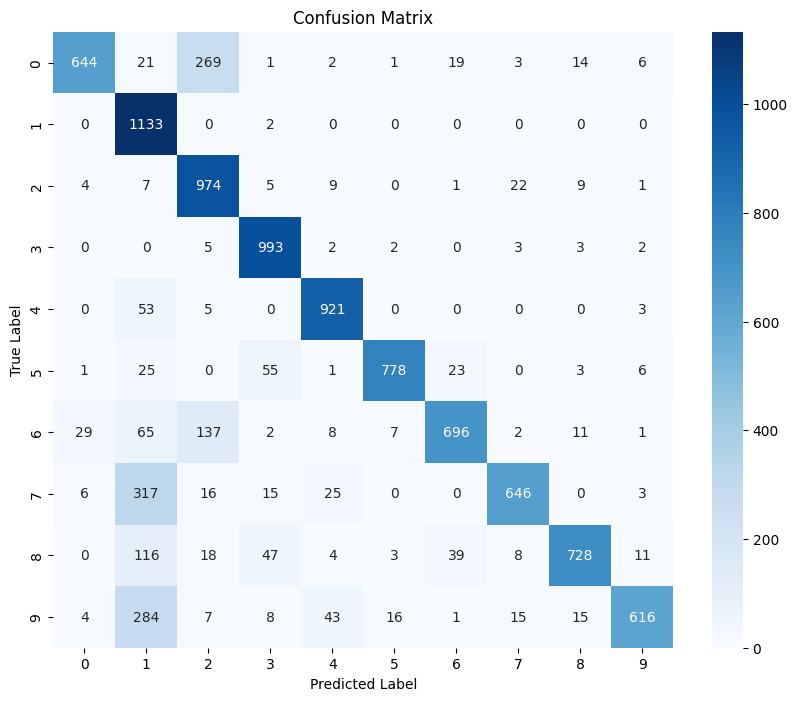

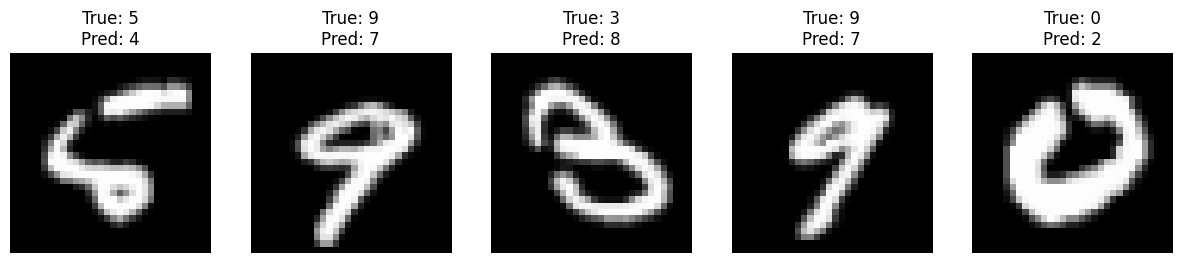

In [ ]:
train_dann(20, svhn_train_loader, mnist_train_loader)
evaluate(mnist_test_loader, class_names)

In [ ]:
mnist_features_after, mnist_labels_after = extract_features(mnist_train_loader, feature_extractor, device)
svhn_features_after, svhn_labels_after = extract_features(svhn_train_loader, feature_extractor, device)

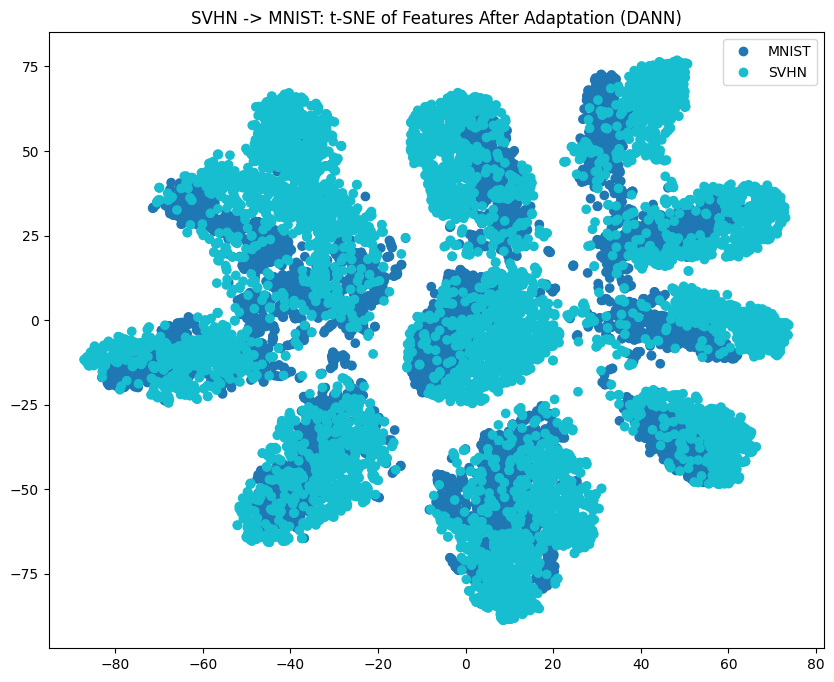

In [ ]:
features_after, labels_after, domain_labels_after = prepare_features(mnist_features_after, svhn_features_after, mnist_labels_after, svhn_labels_after)

plot_tsne(features_after, labels_after,domain_labels_after, 'SVHN -> MNIST: t-SNE of Features After Adaptation (DANN)')

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
feature_extractor = FeatureExtractor().to(device)
label_classifier = LabelClassifier().to(device)
domain_classifier = DomainClassifier().to(device)

optimizer_fe = torch.optim.Adam(feature_extractor.parameters(), lr=0.001)
optimizer_lc = torch.optim.Adam(label_classifier.parameters(), lr=0.001)
optimizer_dc = torch.optim.Adam(domain_classifier.parameters(), lr=0.001)

Epoch [1/20], Classification Loss: 0.2302, Domain Loss: 0.6858
Epoch [2/20], Classification Loss: 0.0819, Domain Loss: 0.6758
Epoch [3/20], Classification Loss: 0.0576, Domain Loss: 0.6829
Epoch [4/20], Classification Loss: 0.0509, Domain Loss: 0.6890
Epoch [5/20], Classification Loss: 0.0489, Domain Loss: 0.6835
Epoch [6/20], Classification Loss: 0.0506, Domain Loss: 0.6782
Epoch [7/20], Classification Loss: 0.0596, Domain Loss: 0.6698
Epoch [8/20], Classification Loss: 0.0446, Domain Loss: 0.6785
Epoch [9/20], Classification Loss: 0.0485, Domain Loss: 0.6784
Epoch [10/20], Classification Loss: 0.0407, Domain Loss: 0.6813
Epoch [11/20], Classification Loss: 0.0393, Domain Loss: 0.6810
Epoch [12/20], Classification Loss: 0.0365, Domain Loss: 0.6816
Epoch [13/20], Classification Loss: 0.0344, Domain Loss: 0.6815
Epoch [14/20], Classification Loss: 0.0368, Domain Loss: 0.6818
Epoch [15/20], Classification Loss: 0.0373, Domain Loss: 0.6708
Epoch [16/20], Classification Loss: 0.0375, Domai

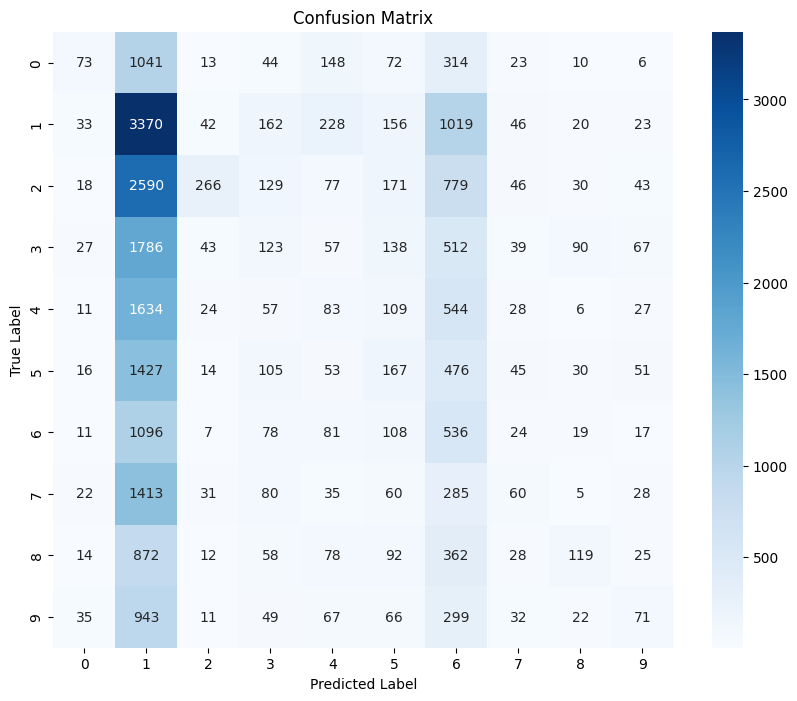

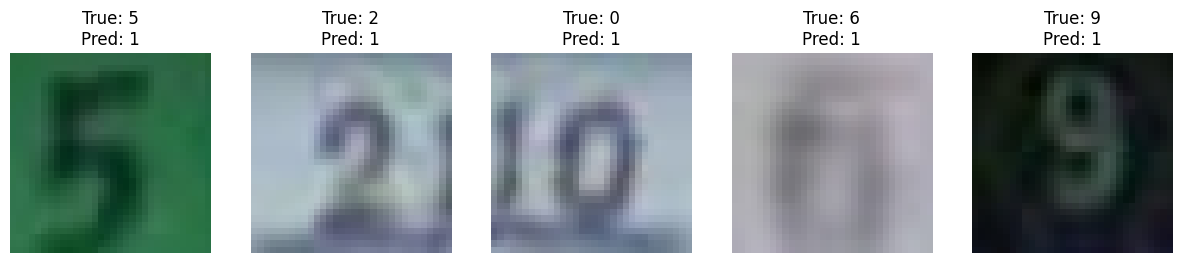

In [ ]:
train_dann(20, mnist_train_loader, svhn_train_loader)
evaluate(svhn_test_loader, class_names)

In [ ]:
mnist_features_after, mnist_labels_after = extract_features(mnist_train_loader, feature_extractor, device)
svhn_features_after, svhn_labels_after = extract_features(svhn_train_loader, feature_extractor, device)

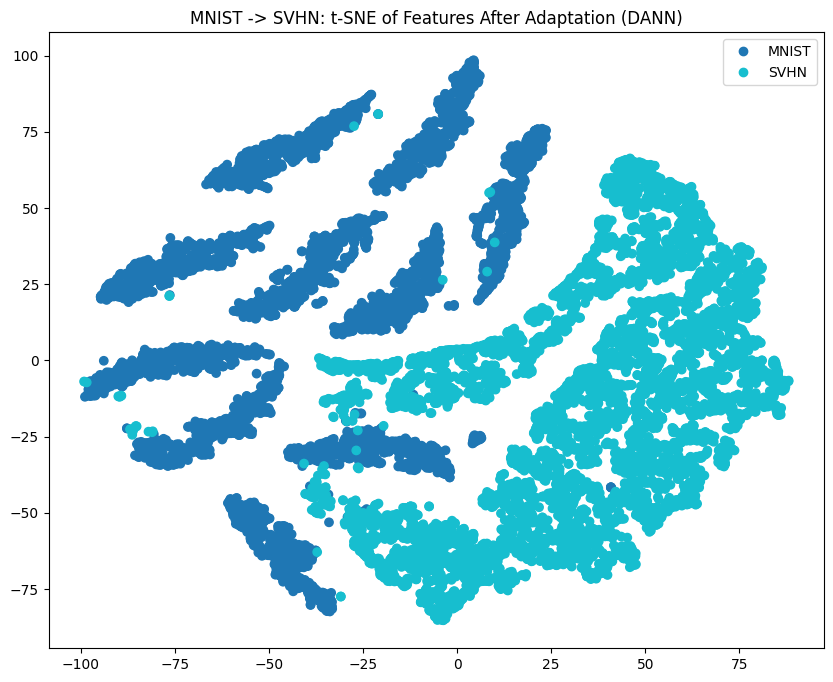

In [ ]:
features_after, labels_after, domain_labels_after = prepare_features(mnist_features_after, svhn_features_after, mnist_labels_after, svhn_labels_after)

plot_tsne(features_after, labels_after,domain_labels_after, 'MNIST -> SVHN: t-SNE of Features After Adaptation (DANN)')